In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from test_function import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, auc, roc_curve,classification_report

In [16]:
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [5]:
#importing data
x_column = ['SIFT_pred','LRT_pred', 'MA_pred', 'PROVEN_pred', 'SLR_score', 'SIFT_score','LRT_omega', 
                'MA_score', 'PROVEN_score', 'Grantham', 'HMMEntropy','HMMRelEntropy', 'PredRSAB', 'PredRSAI', 
                'PredRSAE','PredBFactorF', 'PredBFactorM', 'PredBFactorS', 'PredStabilityH','PredStabilityM', 
                'PredStabilityL', 'PredSSE', 'PredSSH','PredSSC', 'dscore', 'phyloP_pri', 'phyloP_mam','phyloP_ver','RNA_seq','UNEECON']
y_column = 'clinvar_result'

omit = pd.read_csv("unannotated_omit_uneecon.tsv", sep = '\t')
y = omit.loc[:,[y_column]].values.flatten()
X = omit.loc[:,x_column]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.5, random_state = 42) 

domi = pd.read_csv("dominant_std.tsv", sep = '\t')
recess = pd.read_csv("recessive_std.tsv", sep = '\t')
y_domi = domi.loc[:,[y_column]].values.flatten()
X_domi = domi.loc[:,x_column]
X_train_domi, X_test_domi, y_train_domi, y_test_domi = train_test_split(X_domi,y_domi, test_size = 0.3, random_state = 42)
X_train_domi2, X_val_domi, y_train_domi2, y_val_domi = train_test_split(X_train_domi, y_train_domi, test_size = 0.5, random_state = 42) 

y_recess = recess.loc[:,[y_column]].values.flatten()
X_recess = recess.loc[:,x_column]
X_train_recess, X_test_recess, y_train_recess, y_test_recess = train_test_split(X_recess,y_recess, test_size = 0.3, random_state = 42)
X_train_recess2, X_val_recess, y_train_recess2, y_val_recess = train_test_split(X_train_recess, y_train_recess, test_size = 0.5, random_state = 42) 

In [7]:
batch_size = 128
nb_classes = 2
nb_epoch = 100
print(X_train.shape)

(54376, 30)


In [50]:
# def model():
#     model = Sequential()
#     model.add(Dense(output_dim = 1, input_shape = (30,), activation = 'sigmoid'))
#     model.compile(optimizer = SGD(lr = 0.05), loss = 'binary_crossentropy', metrics = ['accuracy'])
#     model.summary()
#     return model 

# domi.model = model
# recess.model = model
# unannotated.model = model

In [30]:
model = Sequential()
model.add(Dense(output_dim = 1, input_shape = (30,), activation = 'sigmoid'))
model.compile(optimizer = Adam(lr = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(30,), activation="sigmoid", units=1)`
  


In [18]:
history_domi = model.fit(X_train_domi2, y_train_domi2, epochs = 150, batch_size = batch_size, validation_data=(X_val_domi, y_val_domi) )
#history_recess = model.fit(X_train_recess, y_train_recess, epochs = 300, batch_size = batch_size, validation_data=(X_val_recess, y_val_recess))
#history = model.fit(X_train, y_train, epochs = 300, batch_size = batch_size, validation_data=(X_val, y_val))


Train on 682 samples, validate on 683 samples
Epoch 1/150
682/682 [==============================] - 0s 19us/step - loss: 0.3067 - accuracy: 0.8680 - val_loss: 0.3504 - val_accuracy: 0.8565
Epoch 2/150
682/682 [==============================] - 0s 18us/step - loss: 0.3062 - accuracy: 0.8710 - val_loss: 0.3511 - val_accuracy: 0.8551
Epoch 3/150
682/682 [==============================] - 0s 20us/step - loss: 0.3056 - accuracy: 0.8754 - val_loss: 0.3515 - val_accuracy: 0.8580
Epoch 4/150
682/682 [==============================] - 0s 16us/step - loss: 0.3054 - accuracy: 0.8768 - val_loss: 0.3521 - val_accuracy: 0.8580
Epoch 5/150
682/682 [==============================] - 0s 17us/step - loss: 0.3050 - accuracy: 0.8768 - val_loss: 0.3526 - val_accuracy: 0.8580
Epoch 6/150
682/682 [==============================] - 0s 17us/step - loss: 0.3047 - accuracy: 0.8798 - val_loss: 0.3531 - val_accuracy: 0.8565
Epoch 7/150
682/682 [==============================] - 0s 16us/step - loss: 0.3044 - accur

682/682 [==============================] - 0s 17us/step - loss: 0.2989 - accuracy: 0.8842 - val_loss: 0.3654 - val_accuracy: 0.8477
Epoch 58/150
682/682 [==============================] - 0s 17us/step - loss: 0.2989 - accuracy: 0.8842 - val_loss: 0.3656 - val_accuracy: 0.8492
Epoch 59/150
682/682 [==============================] - 0s 17us/step - loss: 0.2989 - accuracy: 0.8827 - val_loss: 0.3655 - val_accuracy: 0.8492
Epoch 60/150
682/682 [==============================] - 0s 17us/step - loss: 0.2988 - accuracy: 0.8842 - val_loss: 0.3658 - val_accuracy: 0.8492
Epoch 61/150
682/682 [==============================] - 0s 16us/step - loss: 0.2988 - accuracy: 0.8827 - val_loss: 0.3653 - val_accuracy: 0.8492
Epoch 62/150
682/682 [==============================] - 0s 17us/step - loss: 0.2988 - accuracy: 0.8827 - val_loss: 0.3653 - val_accuracy: 0.8492
Epoch 63/150
682/682 [==============================] - 0s 16us/step - loss: 0.2987 - accuracy: 0.8827 - val_loss: 0.3654 - val_accuracy: 0.849

682/682 [==============================] - 0s 17us/step - loss: 0.2972 - accuracy: 0.8842 - val_loss: 0.3721 - val_accuracy: 0.8477
Epoch 114/150
682/682 [==============================] - 0s 17us/step - loss: 0.2971 - accuracy: 0.8842 - val_loss: 0.3721 - val_accuracy: 0.8477
Epoch 115/150
682/682 [==============================] - 0s 17us/step - loss: 0.2969 - accuracy: 0.8842 - val_loss: 0.3722 - val_accuracy: 0.8477
Epoch 116/150
682/682 [==============================] - 0s 18us/step - loss: 0.2970 - accuracy: 0.8842 - val_loss: 0.3718 - val_accuracy: 0.8477
Epoch 117/150
682/682 [==============================] - 0s 17us/step - loss: 0.2970 - accuracy: 0.8842 - val_loss: 0.3723 - val_accuracy: 0.8477
Epoch 118/150
682/682 [==============================] - 0s 18us/step - loss: 0.2970 - accuracy: 0.8842 - val_loss: 0.3720 - val_accuracy: 0.8477
Epoch 119/150
682/682 [==============================] - 0s 20us/step - loss: 0.2969 - accuracy: 0.8842 - val_loss: 0.3720 - val_accuracy:

In [19]:
def draw(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()


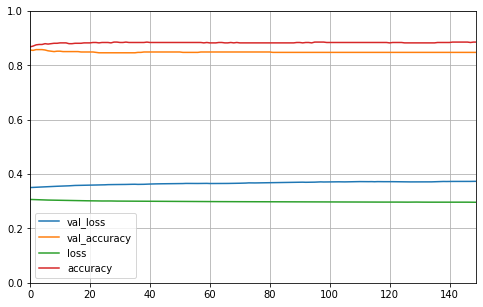

In [20]:
draw(history_domi)
y_domi_testhat = model.predict(X_test_domi)

In [31]:
model_recess = Sequential()
model_recess.add(Dense(output_dim = 1, input_shape = (30,), activation = 'sigmoid'))
model_recess.compile(optimizer = Adam(lr = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_recess.summary()
history_recess = model.fit(X_train_recess2, y_train_recess2, epochs = 150, batch_size = batch_size, validation_data=(X_val_recess, y_val_recess))


/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(30,), activation="sigmoid", units=1)`
  


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Train on 967 samples, validate on 967 samples
Epoch 1/150
967/967 [==============================] - 0s 120us/step - loss: 0.7286 - accuracy: 0.5729 - val_loss: 0.6174 - val_accuracy: 0.6836
Epoch 2/150
967/967 [==============================] - 0s 18us/step - loss: 0.5113 - accuracy: 0.7404 - val_loss: 0.4941 - val_accuracy: 0.7828
Epoch 3/150
967/967 [==============================] - 0s 15us/step - loss: 0.4271 - accuracy: 0.8035 - val_loss: 0.4416 - val_accuracy: 0.8097
Epoch 4/150
967/967 [==============================] - 0s 16us/step - loss: 0.3915 - accuracy: 0.8159 - val_loss: 0.4142 - val_accuracy: 0.8273
Epoch 5/150
967/967 [=======

967/967 [==============================] - 0s 15us/step - loss: 0.3018 - accuracy: 0.8697 - val_loss: 0.3986 - val_accuracy: 0.8656
Epoch 54/150
967/967 [==============================] - 0s 18us/step - loss: 0.3018 - accuracy: 0.8687 - val_loss: 0.4002 - val_accuracy: 0.8666
Epoch 55/150
967/967 [==============================] - 0s 18us/step - loss: 0.3023 - accuracy: 0.8707 - val_loss: 0.4013 - val_accuracy: 0.8676
Epoch 56/150
967/967 [==============================] - 0s 17us/step - loss: 0.3018 - accuracy: 0.8718 - val_loss: 0.4027 - val_accuracy: 0.8687
Epoch 57/150
967/967 [==============================] - 0s 15us/step - loss: 0.3018 - accuracy: 0.8707 - val_loss: 0.4039 - val_accuracy: 0.8666
Epoch 58/150
967/967 [==============================] - 0s 16us/step - loss: 0.3015 - accuracy: 0.8707 - val_loss: 0.4053 - val_accuracy: 0.8666
Epoch 59/150
967/967 [==============================] - 0s 16us/step - loss: 0.3018 - accuracy: 0.8728 - val_loss: 0.4066 - val_accuracy: 0.865

967/967 [==============================] - 0s 19us/step - loss: 0.3001 - accuracy: 0.8707 - val_loss: 0.4703 - val_accuracy: 0.8625
Epoch 110/150
967/967 [==============================] - 0s 19us/step - loss: 0.3009 - accuracy: 0.8707 - val_loss: 0.4720 - val_accuracy: 0.8645
Epoch 111/150
967/967 [==============================] - 0s 16us/step - loss: 0.3005 - accuracy: 0.8707 - val_loss: 0.4732 - val_accuracy: 0.8614
Epoch 112/150
967/967 [==============================] - 0s 16us/step - loss: 0.3004 - accuracy: 0.8676 - val_loss: 0.4746 - val_accuracy: 0.8614
Epoch 113/150
967/967 [==============================] - 0s 16us/step - loss: 0.3001 - accuracy: 0.8676 - val_loss: 0.4757 - val_accuracy: 0.8594
Epoch 114/150
967/967 [==============================] - 0s 17us/step - loss: 0.3003 - accuracy: 0.8676 - val_loss: 0.4773 - val_accuracy: 0.8594
Epoch 115/150
967/967 [==============================] - 0s 17us/step - loss: 0.3005 - accuracy: 0.8697 - val_loss: 0.4779 - val_accuracy:

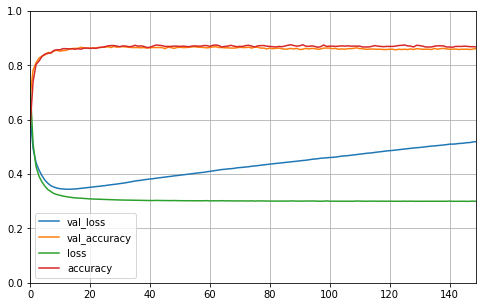

In [32]:
draw(history_recess)
y_recess_testhat = model_recess.predict(X_test_recess)

In [24]:
model = Sequential()
model.add(Dense(output_dim = 1, input_shape = (30,), activation = 'sigmoid'))
model.compile(optimizer = SGD(lr = 0.05), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(X_train2, y_train2, epochs = 150, batch_size = batch_size, validation_data=(X_val, y_val))


/storage/home/jkl5991/.conda/envs/sanEnv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(30,), activation="sigmoid", units=1)`
  


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Train on 27188 samples, validate on 27188 samples
Epoch 1/150
27188/27188 [==============================] - 0s 15us/step - loss: 0.4190 - accuracy: 0.8094 - val_loss: 0.3649 - val_accuracy: 0.8448
Epoch 2/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3631 - accuracy: 0.8444 - val_loss: 0.3530 - val_accuracy: 0.8519
Epoch 3/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3548 - accuracy: 0.8483 - val_loss: 0.3472 - val_accuracy: 0.8542
Epoch 4/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3497 - accuracy: 0.8500 - val_loss: 0.3433 - val_accuracy: 0.8567
Epoch 5/15

27188/27188 [==============================] - 0s 12us/step - loss: 0.3207 - accuracy: 0.8656 - val_loss: 0.3156 - val_accuracy: 0.8698
Epoch 53/150
27188/27188 [==============================] - 0s 12us/step - loss: 0.3206 - accuracy: 0.8652 - val_loss: 0.3157 - val_accuracy: 0.8697
Epoch 54/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3206 - accuracy: 0.8655 - val_loss: 0.3155 - val_accuracy: 0.8704
Epoch 55/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3206 - accuracy: 0.8655 - val_loss: 0.3157 - val_accuracy: 0.8699
Epoch 56/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3205 - accuracy: 0.8657 - val_loss: 0.3155 - val_accuracy: 0.8701
Epoch 57/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3205 - accuracy: 0.8663 - val_loss: 0.3153 - val_accuracy: 0.8705
Epoch 58/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3205 - accuracy: 0.8663 - val_loss: 

27188/27188 [==============================] - 0s 13us/step - loss: 0.3200 - accuracy: 0.8662 - val_loss: 0.3147 - val_accuracy: 0.8704
Epoch 108/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3200 - accuracy: 0.8658 - val_loss: 0.3147 - val_accuracy: 0.8705
Epoch 109/150
27188/27188 [==============================] - 0s 13us/step - loss: 0.3200 - accuracy: 0.8662 - val_loss: 0.3149 - val_accuracy: 0.8707
Epoch 110/150
27188/27188 [==============================] - 0s 12us/step - loss: 0.3200 - accuracy: 0.8660 - val_loss: 0.3148 - val_accuracy: 0.8699
Epoch 111/150
27188/27188 [==============================] - 0s 12us/step - loss: 0.3200 - accuracy: 0.8660 - val_loss: 0.3148 - val_accuracy: 0.8701
Epoch 112/150
27188/27188 [==============================] - 0s 12us/step - loss: 0.3200 - accuracy: 0.8655 - val_loss: 0.3149 - val_accuracy: 0.8698
Epoch 113/150
27188/27188 [==============================] - 0s 12us/step - loss: 0.3200 - accuracy: 0.8659 - val_

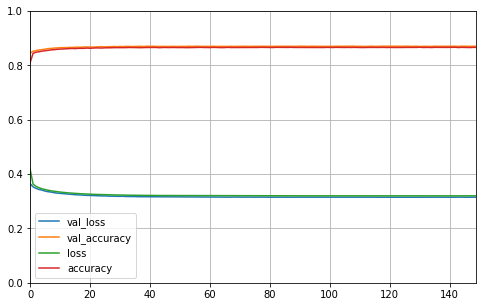

In [25]:
draw(history)
y_testhat = model_recess.predict(X_test)

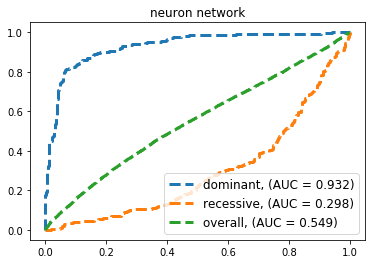

In [33]:
drawROC(y_test_domi, y_domi_testhat, label = 'dominant')
drawROC(y_test_recess, y_recess_testhat, label = 'recessive')
drawROC(y_test, y_testhat, label = 'overall', lastone = True, title = "neuron network")

In [82]:
X_train_recess.shape

(967, 30)

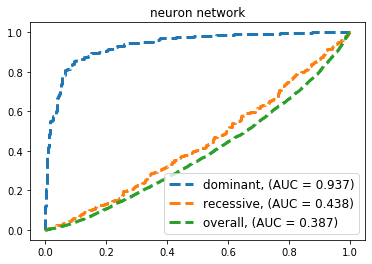

In [16]:
#6***
drawROC(y_test_domi, y_domi_testhat, label = 'dominant')
drawROC(y_test_recess, y_recess_testhat, label = 'recessive')
drawROC(y_test, y_testhat, label = 'overall', lastone = True, title = "neuron network")

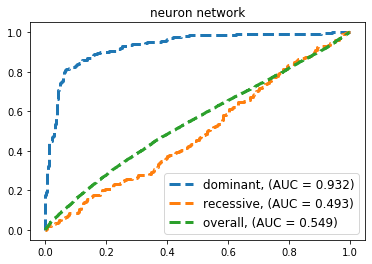

In [26]:
#150
drawROC(y_test_domi, y_domi_testhat, label = 'dominant')
drawROC(y_test_recess, y_recess_testhat, label = 'recessive')
drawROC(y_test, y_testhat, label = 'overall', lastone = True, title = "neuron network")